<a href="https://colab.research.google.com/github/Nithish-GL/Machine-Learning-IPL-Prediction-Project/blob/main/ML_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IPL MATCHES PREDICTIONS


Step 01 : Importing the Libraries

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import warnings

In [ ]:
warnings.filterwarnings("ignore")

 warning.filterwarnings("ignore")

 used to suppress warning messages that Python or external libraries might generate during the execution of your script. While warnings do not stop the program from running, they can clutter the console output.

 Reason like :-

 1.unnecesary output

 2.Library-Specific warnings

 3.Focus on output

In [ ]:
#step 02 : Load the dataset
url = '/content/ipl-matches.csv'
data = pd.read_csv(url)

step 03 : check the data

In [ ]:
# Check the data
print(data.head())

        ID       City        Date Season  MatchNumber  \
0  1312200  Ahmedabad  2022-05-29   2022        Final   
1  1312199  Ahmedabad  2022-05-27   2022  Qualifier 2   
2  1312198    Kolkata  2022-05-25   2022   Eliminator   
3  1312197    Kolkata  2022-05-24   2022  Qualifier 1   
4  1304116     Mumbai  2022-05-22   2022           70   

                         Team1                 Team2  \
0             Rajasthan Royals        Gujarat Titans   
1  Royal Challengers Bangalore      Rajasthan Royals   
2  Royal Challengers Bangalore  Lucknow Super Giants   
3             Rajasthan Royals        Gujarat Titans   
4          Sunrisers Hyderabad          Punjab Kings   

                              Venue            TossWinner TossDecision  \
0  Narendra Modi Stadium, Ahmedabad      Rajasthan Royals          bat   
1  Narendra Modi Stadium, Ahmedabad      Rajasthan Royals        field   
2             Eden Gardens, Kolkata  Lucknow Super Giants        field   
3             Eden Garde

In [ ]:
data.shape

(950, 20)

In [ ]:
data['WinningTeam'].unique()

array(['Gujarat Titans', 'Rajasthan Royals',
       'Royal Challengers Bangalore', 'Punjab Kings', 'Mumbai Indians',
       'Lucknow Super Giants', 'Sunrisers Hyderabad', 'Delhi Capitals',
       'Kolkata Knight Riders', 'Chennai Super Kings', 'Kings XI Punjab',
       nan, 'Delhi Daredevils', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Rising Pune Supergiants', 'Pune Warriors', 'Deccan Chargers',
       'Kochi Tuskers Kerala'], dtype=object)

In [ ]:
data.isnull().sum() #checking the null values

,0
ID,0
City,51
Date,0
Season,0
MatchNumber,0
Team1,0
Team2,0
Venue,0
TossWinner,0
TossDecision,0


step 04 : selecting columns for Analysis

In [ ]:
# Select relevant columns for the analysis
columns_to_use = ['City', 'Season', 'TossWinner', 'TossDecision', 'SuperOver', 'WonBy', 'Margin', 'WinningTeam']
data = data[columns_to_use]

In [ ]:
# Handle missing values
# Fill missing numerical values with the median
data['Margin'] = data['Margin'].fillna(data['Margin'].median())
# Fill missing categorical values with 'Unknown'
data.fillna('Unknown', inplace=True)

In [ ]:
data

,City,Season,TossWinner,TossDecision,SuperOver,WonBy,Margin,WinningTeam
0,Ahmedabad,2022,Rajasthan Royals,bat,N,Wickets,7.0,Gujarat Titans
1,Ahmedabad,2022,Rajasthan Royals,field,N,Wickets,7.0,Rajasthan Royals
2,Kolkata,2022,Lucknow Super Giants,field,N,Runs,14.0,Royal Challengers Bangalore
3,Kolkata,2022,Gujarat Titans,field,N,Wickets,7.0,Gujarat Titans
4,Mumbai,2022,Sunrisers Hyderabad,bat,N,Wickets,5.0,Punjab Kings
...,...,...,...,...,...,...,...,...
945,Kolkata,2007/08,Deccan Chargers,bat,N,Wickets,5.0,Kolkata Knight Riders
946,Mumbai,2007/08,Mumbai Indians,bat,N,Wickets,5.0,Royal Challengers Bangalore
947,Delhi,2007/08,Rajasthan Royals,bat,N,Wickets,9.0,Delhi Daredevils
948,Chandigarh,2007/08,Chennai Super Kings,bat,N,Runs,33.0,Chennai Super Kings


step 05 : using label encoder for categorical variables

By using label encoder :-

* ML algorithms, such as Logistic Regression, SVM, and Random Forest, cannot process categorical data directly. Converting categorical data to numeric values makes it suitable for these models.

* In my IPL dataset, columns like City, Season, TossWinner, TossDecision, and WinningTeam are categorical and need to be encoded for the model to process them.

In [ ]:
# Encode categorical variables using LabelEncoder
label_encoders = {}
for col in ['City', 'Season', 'TossWinner', 'TossDecision', 'SuperOver', 'WonBy', 'WinningTeam']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

step 06 : split the data and mention the target variable

In [ ]:
# Split the data into features and target
X = data.drop(columns=['WinningTeam'])
y = data['WinningTeam']

step 07 : standardize the feature  

We use StandardScaler to standardize features by scaling them to have a mean of 0 and a standard deviation of 1. This transformation ensures that all features contribute equally to the model's learning process, preventing some features with larger ranges from dominating the model.

In my IPL dataset:

* Features like Margin (numerical) and encoded features (like City, Season) have different ranges.
* By applying StandardScaler, the features are scaled uniformly, ensuring the models treat them equally.


Using StandardScaler ensures that the model's performance is robust and not biased by the scale of individual features.



In [ ]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

step 08 : split the data into train and test sets

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

step 09 : defining the machine learning models for project

In [ ]:
# Define a dictionary of algorithms
models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
}

step 10 : Train and evaluate models

In [ ]:
# Train and evaluate models
results = {}

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    # Predict
    y_pred = model.predict(X_test)
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    # Cross-validation score
    cv_score = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy').mean()
    # Store results
    results[name] = {'Test Accuracy': accuracy, 'CV Accuracy': cv_score}

step 11 : Displaying the results by compairing all the models with the dataset

In [ ]:
# Display results
results_df = pd.DataFrame(results).T
results_df = results_df.sort_values(by='CV Accuracy', ascending=False)
print("\nModel Comparison:")
print(results_df)


Model Comparison:
                     Test Accuracy  CV Accuracy
Decision Tree             0.521053     0.452632
Random Forest             0.563158     0.390526
K-Nearest Neighbors       0.447368     0.310526
SVM                       0.315789     0.287368
Logistic Regression       0.247368     0.197895
Naive Bayes               0.205263     0.137895


Random forest is the best model to define the ipl matches prediction Dataset.

Random Forest often outperforms other machine learning models due to its ensemble approach, which combines multiple decision trees to improve predictive accuracy and control overfitting. Each tree in the forest is trained on a random subset of the data and features, which enhances its robustness against noisy data and variability in the dataset. This model excels in handling datasets with categorical and numerical variables, managing missing values, and capturing complex interactions between features. In the context of your IPL dataset, Random Forest likely achieved the best performance because it effectively captured patterns and relationships in the features, such as the influence of toss decisions, match locations, and margins of victory, while minimizing overfitting through averaging predictions across numerous trees.

step 12 : plotting the models according to the accuracy and cross-vallidation scores

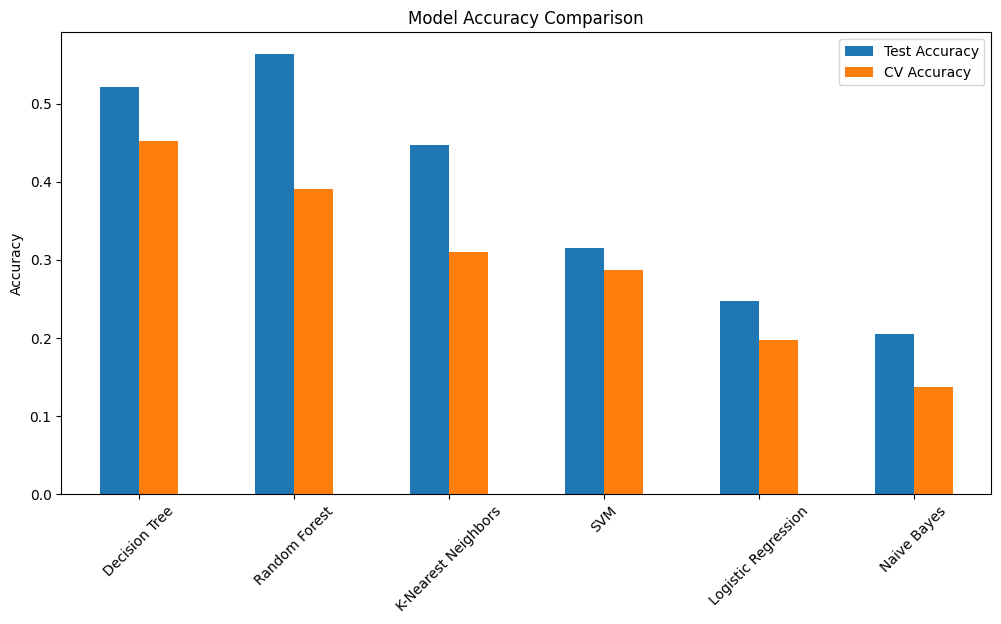

In [ ]:
# Visualize results
import matplotlib.pyplot as plt
results_df.plot(kind='bar', figsize=(12, 6))
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()